In [61]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, recall_score, precision_score,r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold
from scipy.stats import spearmanr

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [2]:
# 데이터셋 로드 및 설명 
raw_data = pd.read_excel('ToyotaCorolla_Simple.xls')
raw_data.head()

,Id,Model,Age_08_04,Mfg_Month,KM,HP,cc,Quarterly_Tax,Weight,Price (Y)
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,10,46986,90,2000,210,1165,13500
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,10,72937,90,2000,210,1165,13750
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,9,41711,90,2000,210,1165,13950
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,7,48000,90,2000,210,1165,14950
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30,3,38500,90,2000,210,1170,13750


In [3]:
data= raw_data.drop('Id', axis = 1)

In [4]:
print(f'관측치 수 : {data.shape[0]} \n변수 수 : {data.shape[1]}')

관측치 수 : 1436 
변수 수 : 9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          1436 non-null   object
 1   Age_08_04      1436 non-null   int64 
 2   Mfg_Month      1436 non-null   int64 
 3   KM             1436 non-null   int64 
 4   HP             1436 non-null   int64 
 5   cc             1436 non-null   int64 
 6   Quarterly_Tax  1436 non-null   int64 
 7   Weight         1436 non-null   int64 
 8   Price (Y)      1436 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 101.1+ KB


In [6]:
data.rename(columns = {'Price (Y)' : 'Price'}, inplace = True)

In [7]:
data.nunique()

Model             372
Age_08_04          77
Mfg_Month          12
KM               1263
HP                 12
cc                 13
Quarterly_Tax      13
Weight             59
Price             236
dtype: int64

In [8]:
#누락데이터 확인 - 없음
data.isnull().sum()

Model            0
Age_08_04        0
Mfg_Month        0
KM               0
HP               0
cc               0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

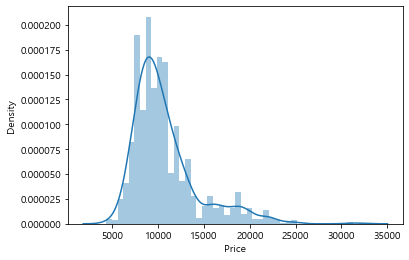

In [9]:
f = sns.distplot(data['Price'])

In [10]:
data['Price2']= np.log1p(data['Price'])

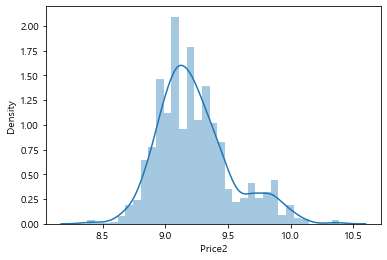

In [11]:
f2 = sns.distplot(data['Price2'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          1436 non-null   object 
 1   Age_08_04      1436 non-null   int64  
 2   Mfg_Month      1436 non-null   int64  
 3   KM             1436 non-null   int64  
 4   HP             1436 non-null   int64  
 5   cc             1436 non-null   int64  
 6   Quarterly_Tax  1436 non-null   int64  
 7   Weight         1436 non-null   int64  
 8   Price          1436 non-null   int64  
 9   Price2         1436 non-null   float64
dtypes: float64(1), int64(8), object(1)
memory usage: 112.3+ KB


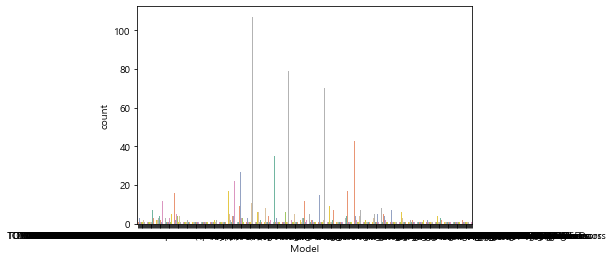

In [13]:
f=sns.countplot(data['Model'],palette='Set2')

In [14]:
data= data.drop('Model', axis = 1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_08_04      1436 non-null   int64  
 1   Mfg_Month      1436 non-null   int64  
 2   KM             1436 non-null   int64  
 3   HP             1436 non-null   int64  
 4   cc             1436 non-null   int64  
 5   Quarterly_Tax  1436 non-null   int64  
 6   Weight         1436 non-null   int64  
 7   Price          1436 non-null   int64  
 8   Price2         1436 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 101.1 KB


In [16]:
target = ['Price','Price2']
print(target)

feature = list(set(data.columns) - set(target))
print(feature)

['Price', 'Price2']
['Weight', 'HP', 'cc', 'KM', 'Mfg_Month', 'Quarterly_Tax', 'Age_08_04']


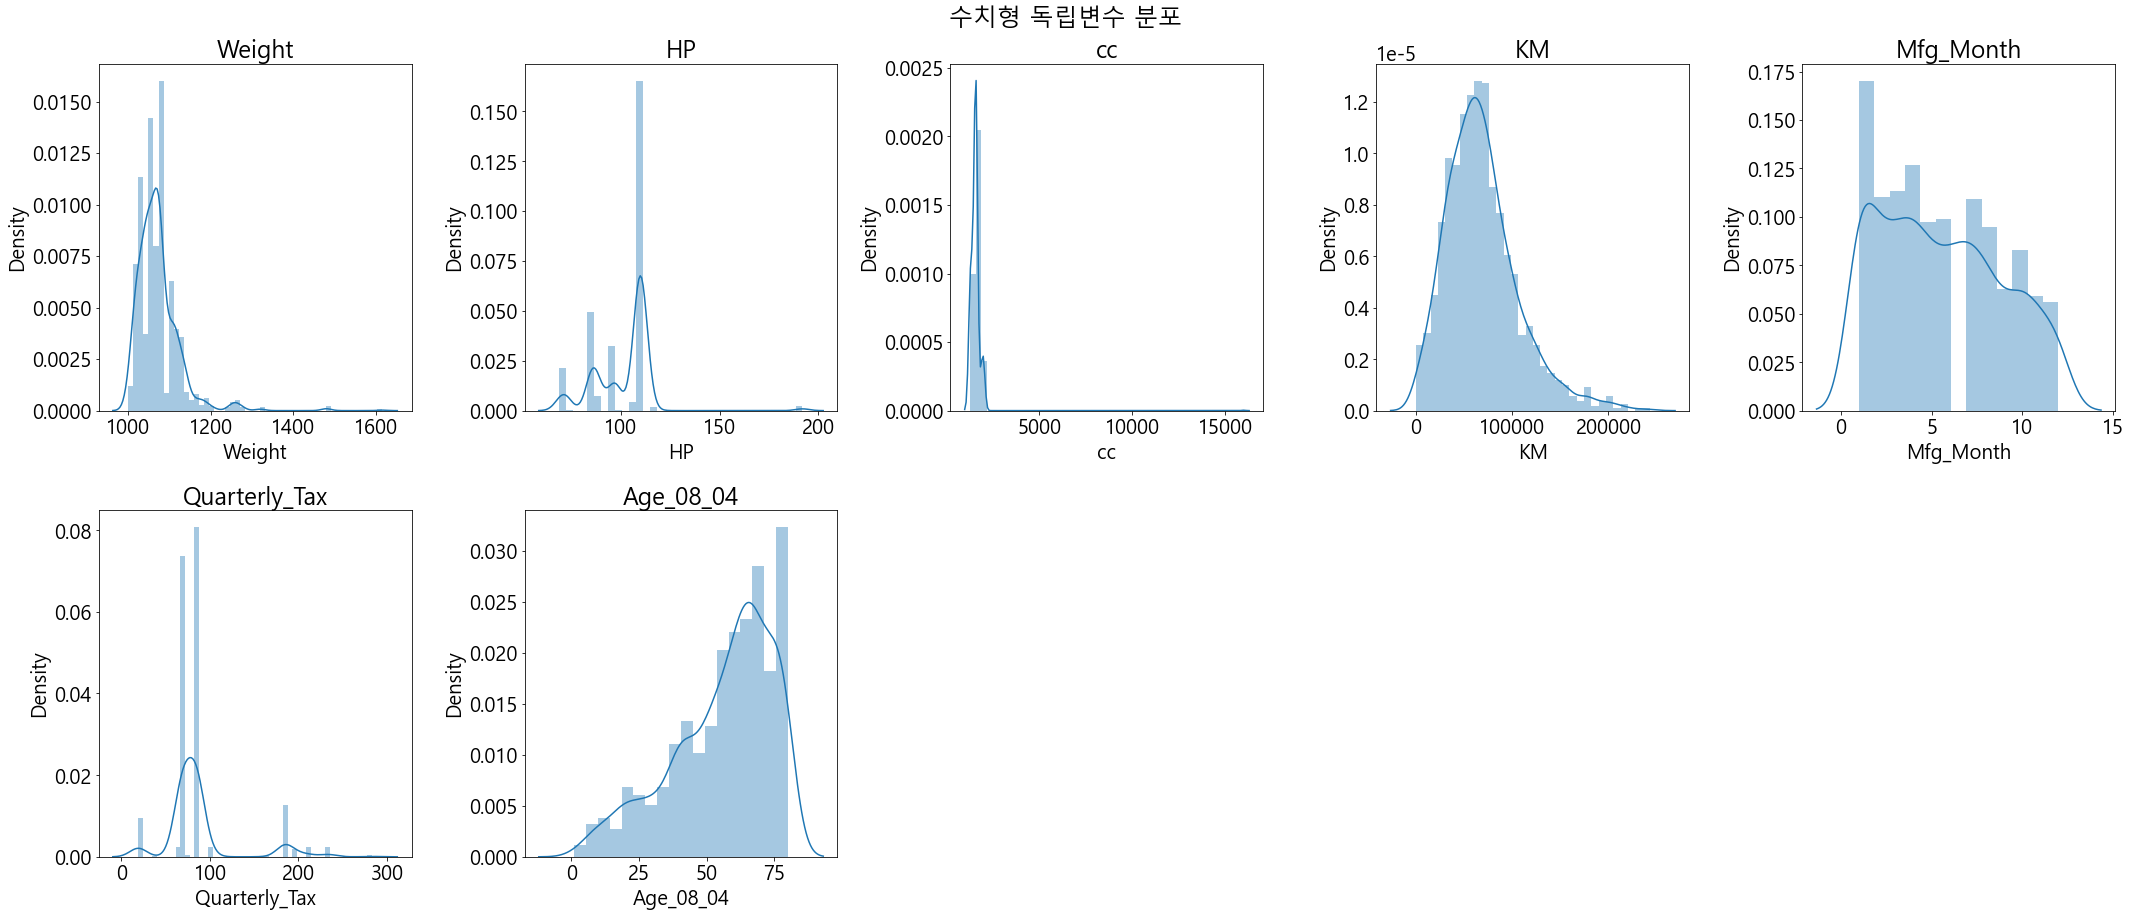

In [17]:
fig = plt.figure(figsize=(30,25))
plt.rc('font', size=20)
fig.suptitle('수치형 독립변수 분포')

for i in range(len(feature)):
    ax = fig.add_subplot(4,5,i+1)
    ax = sns.distplot(data[feature[i]])
    plt.title(feature[i])
fig.tight_layout()
plt.show()

<AxesSubplot:>

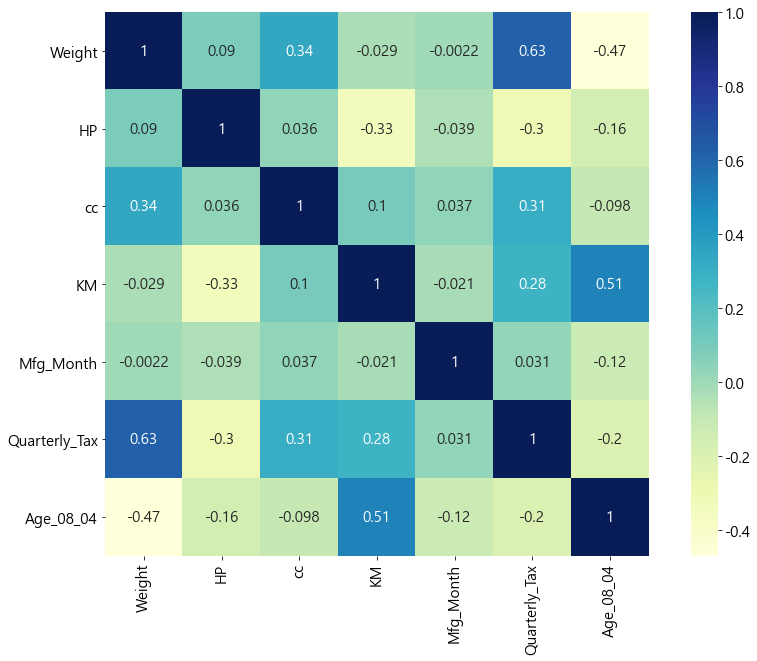

In [18]:
#상관관계분석 피어슨 이용
plt.figure(figsize=(15,10))
plt.rc('font', size=15)
sns.heatmap(data[feature].corr(),annot=True,square = True, annot_kws={'size' : 15},cmap='YlGnBu')


In [19]:
X = data[feature]
y = pd.DataFrame(data['Price'])
X

,Weight,HP,cc,KM,Mfg_Month,Quarterly_Tax,Age_08_04
0,1165,90,2000,46986,10,210,23
1,1165,90,2000,72937,10,210,23
2,1165,90,2000,41711,9,210,24
3,1165,90,2000,48000,7,210,26
4,1170,90,2000,38500,3,210,30
...,...,...,...,...,...,...,...
1431,1025,86,1300,20544,12,69,69
1432,1015,86,1300,19000,9,69,72
1433,1015,86,1300,17016,10,69,71
1434,1015,86,1300,16916,11,69,70


In [34]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [22]:
# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (1005, 7)
Test set dimension is (431, 7)


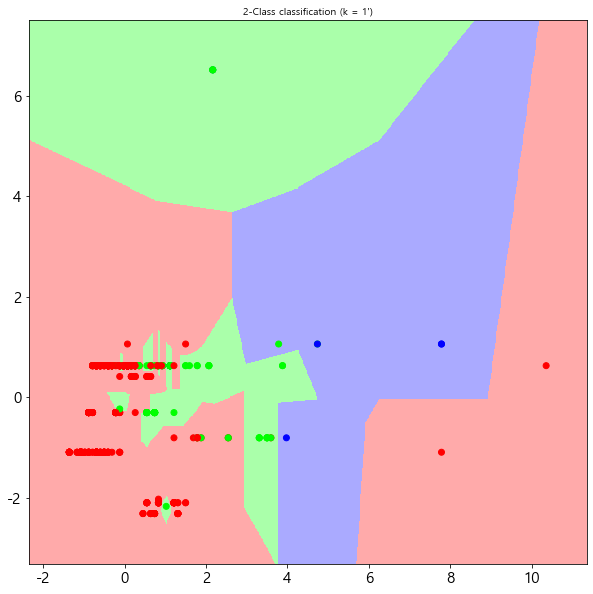

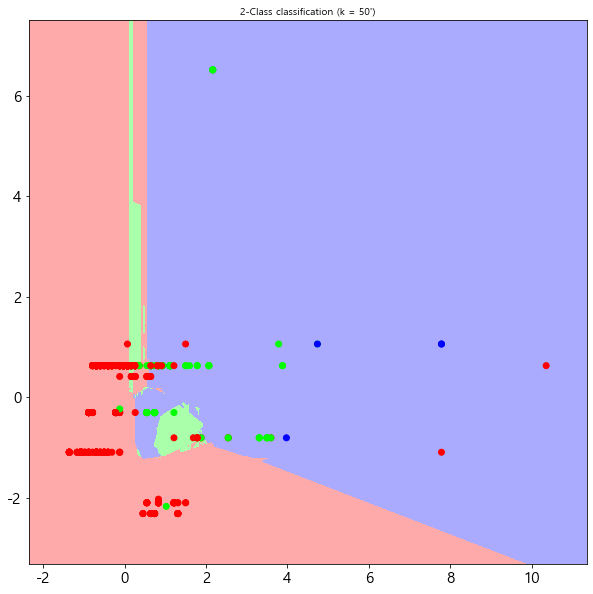

In [23]:
X_vis = X_train[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
y_vis = y_train.values.ravel()

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1, 50]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_vis, y_vis)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k = {k}')", fontsize=10)

plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:03<00:00, 13.41it/s]


Best k value :  [14]


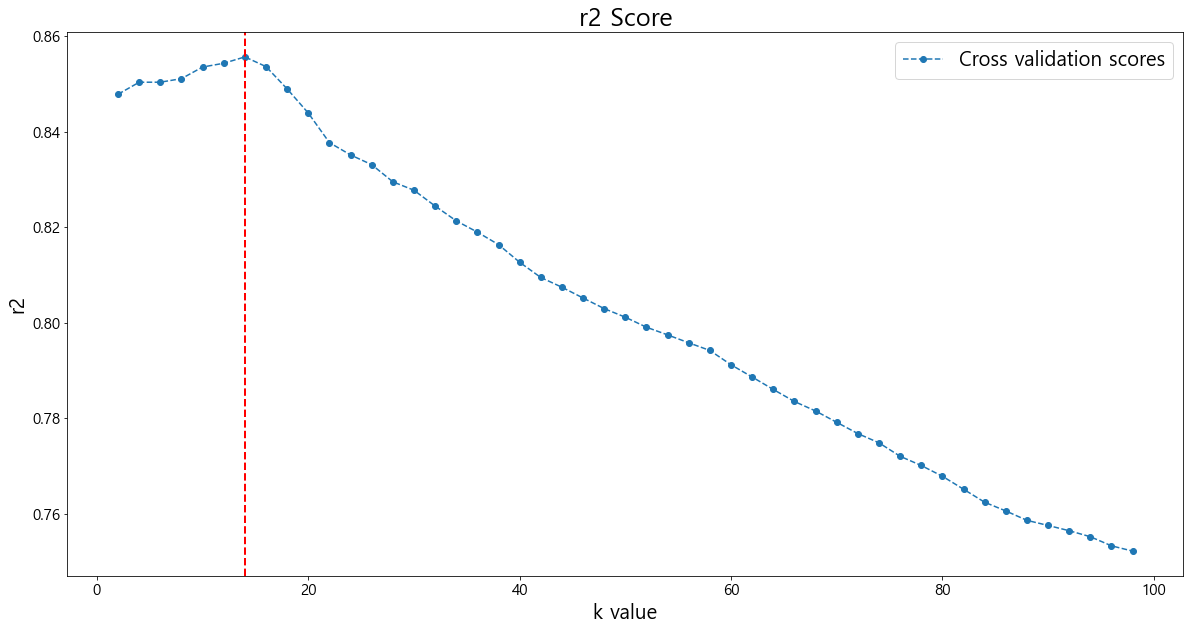

In [24]:
k_list = [i for i in range(1,100) if i%2 !=1]
cv_scores = []
for k in tqdm(k_list):
    regressor = KNeighborsRegressor(n_neighbors = k, p=2)  # p=1: manhattan_distance , p=2: euclidean_distance
                                                             # p=l_p: minkowski_distance
    scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring = 'r2')
    cv_scores.append(scores.mean())
    
best_k = [k_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
print("Best k value : ", best_k)

plt.figure(figsize=(20,10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.legend(["Cross validation scores"], fontsize=20)
plt.xlabel("k value", fontsize=20 )
plt.ylabel("r2", fontsize=20)
plt.title("r2 Score", fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [49]:
k_list = [i for i in range(1,50)]

euc = []
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)  
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = 'r2')
    euc.append(scores.mean()) 

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:03<00:00, 15.42it/s]


In [56]:
k_list = [i for i in range(1,50)]

man = []
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=1) 
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = 'r2')
    man.append(scores.mean()) 
best_k = [k_list[i] for i in range(len(man)) if man[i] == np.max(man)]
print("Best k value : ", best_k)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:03<00:00, 15.54it/s]

Best k value :  [1]


In [51]:
# y_train = y_train.values.ravel()
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

k_list = [i for i in range(1,50)]

mah = []
for k in tqdm(k_list):

# K-fold cross validation
    mah_r2 = []
    for train_index, valid_index in kf.split(X_train):
        X_train_f = X_train[train_index]
        y_train_f = y_train[train_index]

        X_valid_f = X_train[valid_index]
        y_valid_f = y_train[valid_index]


        nn = NearestNeighbors(algorithm='brute', metric='mahalanobis', 
                              metric_params={'V':np.cov(X_train_f, rowvar=False)}, n_neighbors=k)
        nn_model = nn.fit(X_train_f,y_train_f)
        
        
        max_key=[]
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            y_list={}
            for i in range(len(indices[0])):
                y_list[y_train_f[indices[0][i]]]=0
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] == y_train_f[indices[0][i]]:
                    y_list[y_train_f[indices[0][i]]] += 1
            max_key.append(np.int(max(y_list, key=y_list.get)))
            
                
        mah_r2.append(r2_score(y_valid_f, max_key))
    mah.append(np.mean(mah_r2))

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:49<00:00,  1.02s/it]


In [52]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

k_list = [i for i in range(1,50)]

pear = []
for k in tqdm(k_list):
# K-fold cross validation
    pear_r2 = []
    for train_index, valid_index in kf.split(X_train):
        X_train_f = X_train[train_index]
        y_train_f = y_train[train_index]

        X_valid_f = X_train[valid_index]
        y_valid_f = y_train[valid_index]

        nn = NearestNeighbors(metric='correlation', n_neighbors=k)
        nn_model = nn.fit(X_train_f,y_train_f)
        
        max_key=[]
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            y_list={}
            for i in range(len(indices[0])):
                y_list[y_train_f[indices[0][i]]]=0
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] == y_train_f[indices[0][i]]:
                    y_list[y_train_f[indices[0][i]]] += 1
            max_key.append(np.int(max(y_list, key=y_list.get)))
            
        pear_r2.append(r2_score(y_valid_f, max_key))
    pear.append(np.mean(pear_r2))

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:24<00:00,  2.02it/s]


In [ ]:
def spearmancorr(x,y):
    rho, pval = spearmanr(x, y, axis=0)
    return 1-rho

kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

k_list = [i for i in range(1,100) if i%2 !=1]

spear = []
for k in tqdm(k_list):

# K-fold cross validation
    spear_r2 = []
    for train_index, valid_index in kf.split(X_train):
        X_train_f = X_train[train_index]
        y_train_f = y_train[train_index]

        X_valid_f = X_train[valid_index]
        y_valid_f = y_train[valid_index]

        nn = NearestNeighbors(metric = spearmancorr, n_neighbors=k, algorithm='ball_tree')
        nn_model = nn.fit(X_train_f,y_train_f)
        
        max_key=[]
        for v in range(len(X_valid_f)):
            distance, indices = nn_model.kneighbors(X_valid_f[v].reshape(1,-1))
            
            y_list={}
            for i in range(len(indices[0])):
                y_list[y_train_f[indices[0][i]]]=0
            for i in range(len(indices[0])):
                if y_train_f[indices[0][i]] == y_train_f[indices[0][i]]:
                    y_list[y_train_f[indices[0][i]]] += 1
            max_key.append(np.int(max(y_list, key=y_list.get)))

        spear_r2.append(r2_score(y_valid_f, max_key))
    spear.append(np.mean(spear_r2))

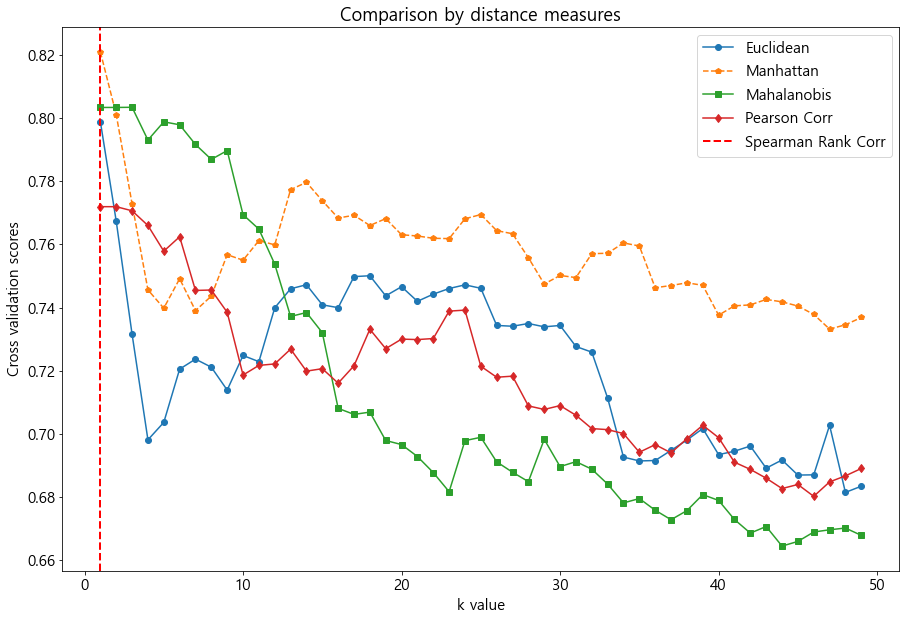

In [55]:
plt.figure(figsize=(15,10))
# plt.plot(k_list, acc_spear, marker='o', linestyle='dashed')
plt.plot(k_list, euc, marker='o')
plt.plot(k_list, man, linestyle='dashed', marker='p')
plt.plot(k_list, mah, marker='s')
plt.plot(k_list, pear, marker='d')
# plt.plot(k_list, spear, marker='v')
plt.axvline(1, color='r', linestyle='--', linewidth=2)
# plt.axvline(15, color='r', linestyle='--', linewidth=2)
# plt.axhline(0.9815, color='r', linestyle='--', linewidth=2)
plt.xlabel("k value")
plt.ylabel("Cross validation scores")
plt.title("Comparison by distance measures")
plt.legend(["Euclidean","Manhattan","Mahalanobis","Pearson Corr","Spearman Rank Corr"])
plt.show()

In [62]:
classifier = KNeighborsClassifier(n_neighbors = 1, p=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

r2_man= r2_score(y_true = y_test, y_pred =y_pred)
print(f"r2_score:{r2_man:f}") 
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

r2_score:0.845433
MSE: 2090254.181
RMSE: 1445.771
MAE: 1095.763


# weighted - 이전 최고성능인 manhatan이용

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:04<00:00, 11.96it/s]


Best k value :  [13]


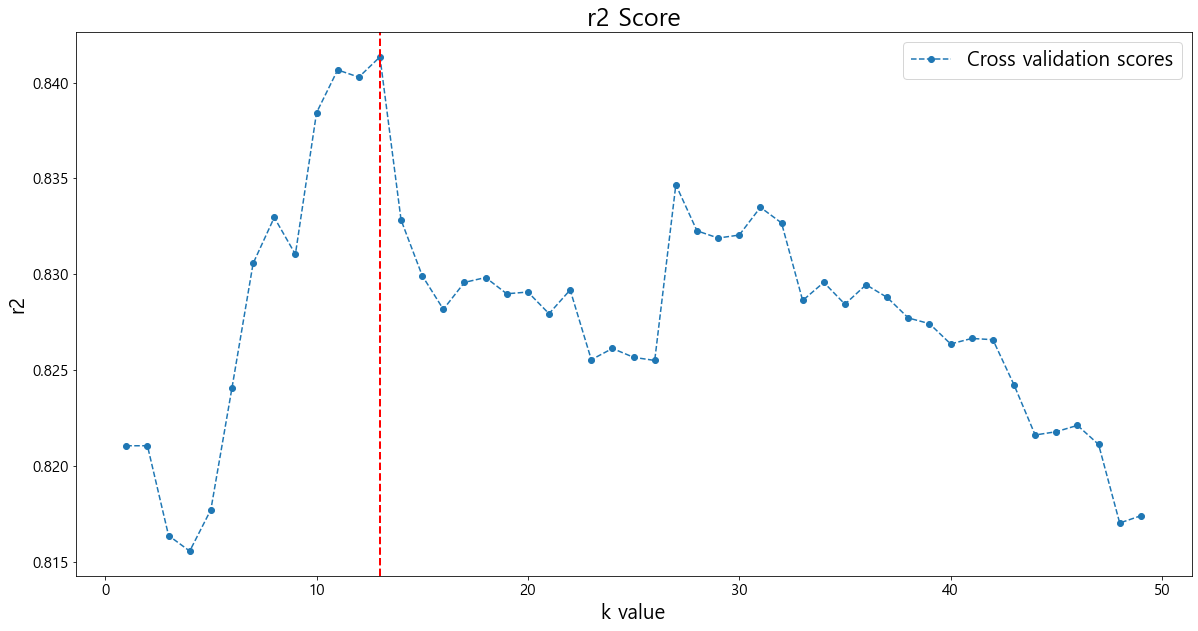

In [65]:
k_list = [i for i in range(1,50)]

wei_man = []
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=1, weights='distance') # weights{‘uniform’, distance’} or callable, 
                                                                                # default=’uniform’
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = 'r2')
    wei_man.append(scores.mean()) 
    
best_k = [k_list[i] for i in range(len(wei_man)) if wei_man[i] == np.max(wei_man)]
print("Best k value : ", best_k)

plt.figure(figsize=(20,10))
plt.plot(k_list, wei_man, marker='o', linestyle='dashed')
plt.legend(["Cross validation scores"], fontsize=20)
plt.xlabel("k value", fontsize=20 )
plt.ylabel("r2", fontsize=20)
plt.title("r2 Score", fontsize=25)
plt.axvline(best_k[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [66]:
classifier = KNeighborsClassifier(n_neighbors = 13, p=1, weights='distance')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

r2_man= r2_score(y_true = y_test, y_pred =y_pred)
print(f"r2_score:{r2_man:f}") 
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

r2_score:0.879283
MSE: 1632494.374
RMSE: 1277.691
MAE: 992.258


# 다른 모델과 비교 - 다중선형회귀

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [69]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     910.7
Date:                Sun, 09 May 2021   Prob (F-statistic):               0.00
Time:                        03:53:35   Log-Likelihood:                -8651.2
No. Observations:                1005   AIC:                         1.732e+04
Df Residuals:                     997   BIC:                         1.736e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.072e+04     41.967    255.546      0.0

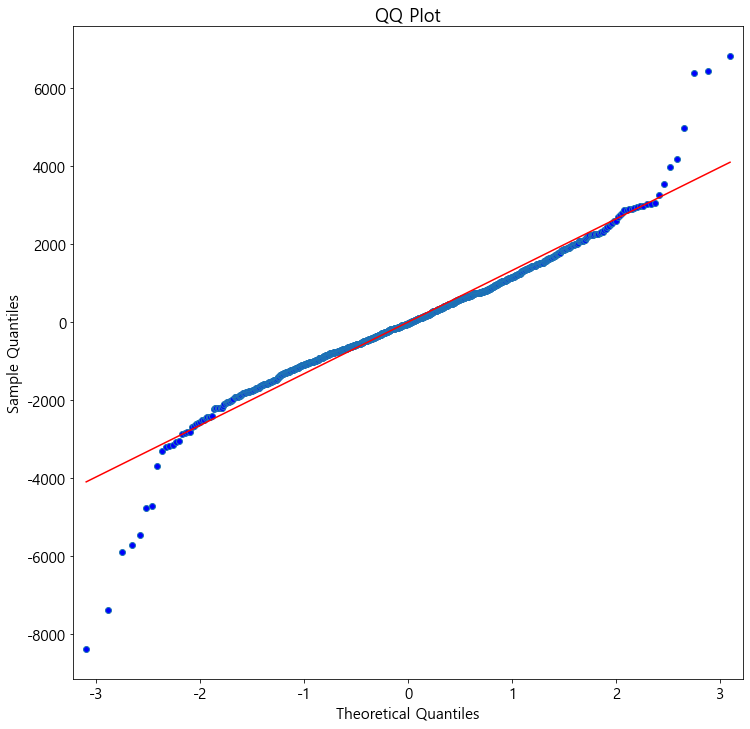

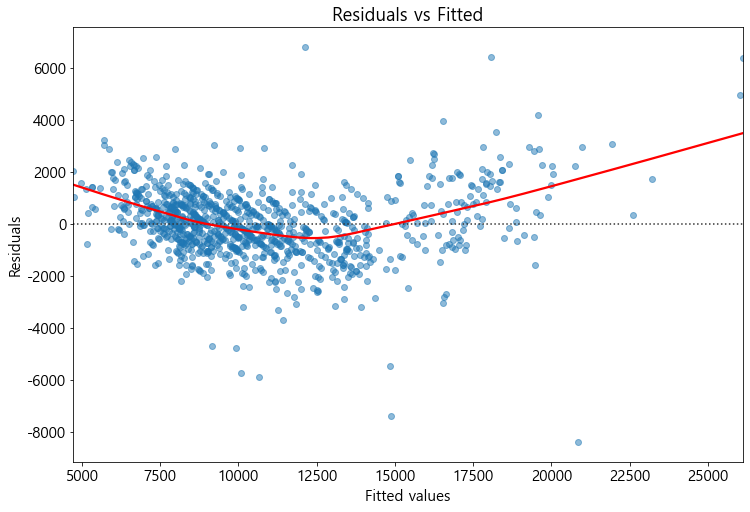

In [72]:
#QQ plot 선형성 확인
model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

#잔차 검증
model_fitted_y= model_trained.fittedvalues
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

#결과 출력
print(model_trained.summary())

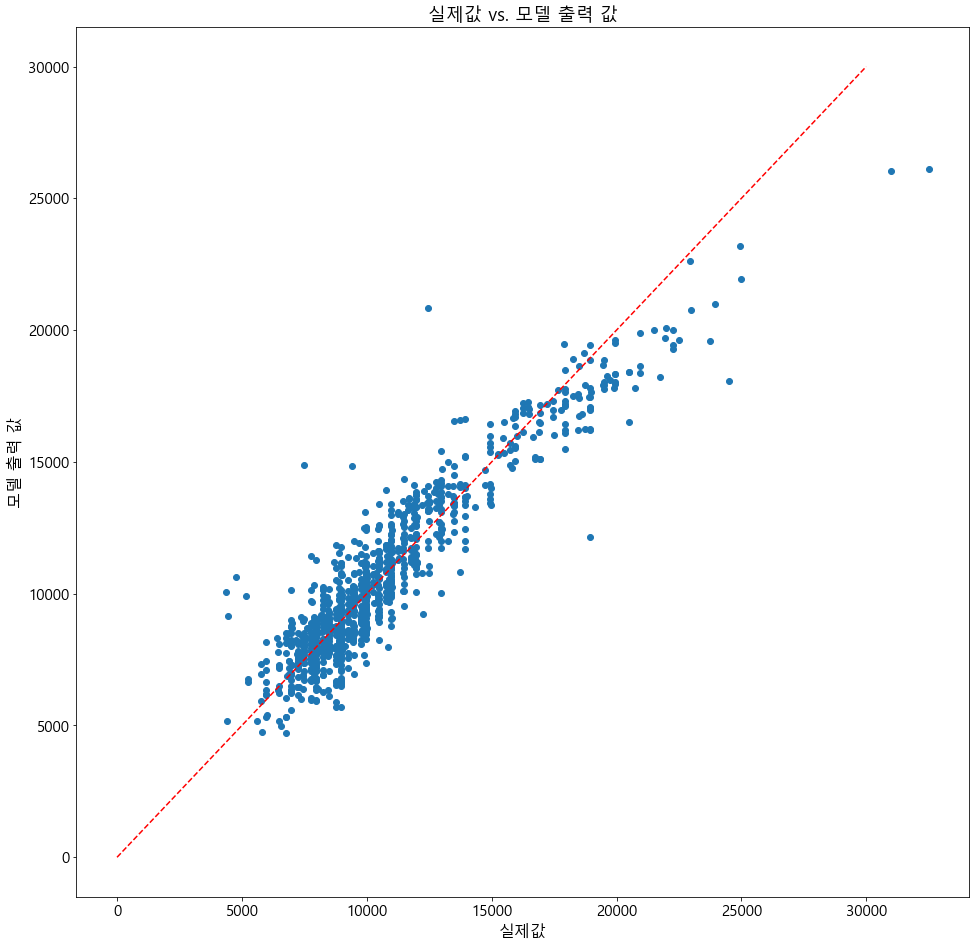

Training MSE: 1755957.242
Training RMSE: 1325.125
Training MAE: 970.444
Training MAPE: 9.654
Training R2: 0.865
---------------------------------------------------------
Testing MSE: 1539587.678
Testing RMSE: 1240.801
Testing MAE: 972.351
Testing MAPE: 35.365
Testing R2: 0.886
---------------------------------------------------------


In [77]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 30000], [-5, 30000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
# plt.xlim(-5, 1000)
# plt.ylim(-5, 1000)
plt.show()

# 위에서도 상수 Beta0 빼면 이것도 빼야해
X_test = sm.add_constant(X_test) 
y_test_pred = model_trained.predict(X_test)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')